In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import animation, rc
from IPython.display import HTML

# read data

In [2]:
df = pd.read_csv('Taiwan.txt', header=None, sep=' ')
x = df[0].values
y = df[1].values
mid_x = min(x) + (max(x) - min(x)) / 2
mid_y = min(y) + (max(y) - min(y)) / 2
x = np.array((x - mid_x) * 10)
y = np.array((y - mid_y) * 10)
data = x + 1j * y

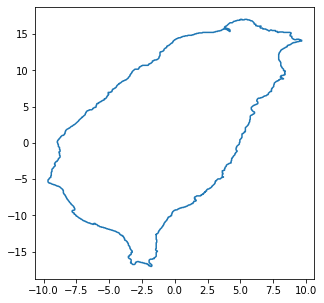

In [3]:
fig = plt.figure(figsize=(5,5))
plt.plot(np.real(data), np.imag(data));

# Fourier series

In [6]:
def get_coeff(n, data):
    delta_t = 1 / len(data)
    t = np.arange(0, 1, delta_t)
    return sum(data * np.exp((-n) * 2 * np.pi * 1j * t) * delta_t)

def sort_coeff(coeffs):
    sorted_coeffs = []
    mid_idx = int((len(coeffs) -  1) / 2)
    sorted_coeffs.append(coeffs[mid_idx])
    for i in range(1, mid_idx+1):
        sorted_coeffs.append(coeffs[mid_idx+i])
        sorted_coeffs.append(coeffs[mid_idx-i])
    return sorted_coeffs

# set n number of series
n_number = 5
coeffs = []
for n in range(-n_number, n_number+1):
    coeffs.append(get_coeff(n, data))
coeffs = sort_coeff(coeffs)

# Animate

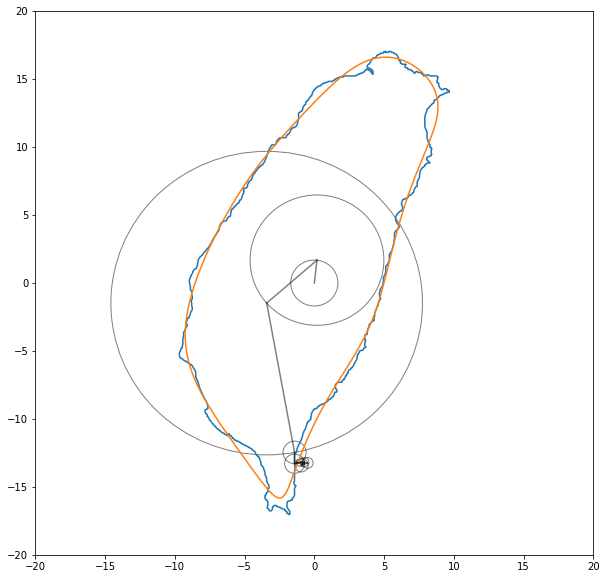

In [8]:
fig, ax = plt.subplots(figsize=(10,10));
# plt.xlim(min(np.real(data)) - 10, max(np.real(data) + 10))
# plt.ylim(min(np.imag(data)) - 10, max(np.imag(data) + 10))
plt.xlim(-20, 20);
plt.ylim(-20, 20);
plt.plot(np.real(data), np.imag(data));

lines, circles = [], []
fits = []
start_point = 0 + 0 * 1j
plot, = ax.plot([], [])
for idx, coeff in enumerate(coeffs):
    end_point = start_point + coeff
    circles.append(plt.Circle((np.real(start_point), np.imag(start_point)), np.abs(coeff), fill=False, alpha=0.5));
    lines.append(plt.Line2D([np.real(start_point), np.real(end_point)],
                            [np.imag(start_point), np.imag(end_point)], color='k', alpha=0.5));
    ax.add_artist(circles[idx]);
    ax.add_artist(lines[idx]);
    start_point = end_point

circles.append(plt.Circle((0, 0), 0, fill=False));

def animate(t):
    start_point = 0 + 0 * 1j
    for idx, coeff in enumerate(coeffs):
        if idx == 0:
            end_point = start_point + coeff
        elif idx % 2 == 1:
            end_point = start_point + coeff * np.exp((idx+1)/2 * t * 1j)
            lines[idx].set_data([np.real(start_point), np.real(end_point)],
                                [np.imag(start_point), np.imag(end_point)]);
        elif idx % 2 == 0:
            end_point = start_point + coeff * np.exp((-idx/2) * t * 1j)
            lines[idx].set_data([np.real(start_point), np.real(end_point)],
                                [np.imag(start_point), np.imag(end_point)]);
        circles[idx+1].center = np.real(end_point), np.imag(end_point);
        start_point = end_point
    fits.append(end_point)
    plot.set_data(np.real(fits), np.imag(fits));
    

anim = animation.FuncAnimation(fig, animate, frames=np.arange(0, 2 * np.pi, 0.01), interval=15, repeat=True);
HTML(anim.to_html5_video())